In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
# In this example we replicate the following workflow 
# * Define temporal and spatial characteristics of a given event 
#     e.g. Hurricane Florence which was a very recent major hurricane 
#     to impact Southeastern US
# * Search for all available (whole orbit) granules for that event and 
#    download them from PO.DAAC Drive to the local machine
# * View files in the Panoply data viewer
#    more information on Panoply can be found at
#    https://www.giss.nasa.gov/tools/panoply/
# * Streamline the above data acquisition task using PO.DAAC's
#    Level 2 Subsetting software to download a regional data subset for the
#    event at the given space and time.
# * Finally, view the subsetted granule again in Panoply

# In this example we has chosen the MetOp-A ASCAT Level 2 Ocean 
# Surface Wind Vectors Optimized for Coastal Ocean collection as our 
# subject matter.
# This dataset contains operational near-real-time Level 2 coastal 
# ocean surface wind vector retrievals from the Advanced Scatterometer 
# (ASCAT) on MetOp-A at 12.5 km sampling resolution 
# (note: the effective resolution is 25 km). It is a product of 
# the European Organization for the Exploitation of Meteorological 
# Satellites (EUMETSAT) Ocean and Sea Ice Satellite Application 
# Facility (OSI SAF) provided through the Royal Netherlands 
# Meteorological Institute (KNMI)

# More information on the MetOp mission specification can 
# be found at https://podaac.jpl.nasa.gov/MetOp

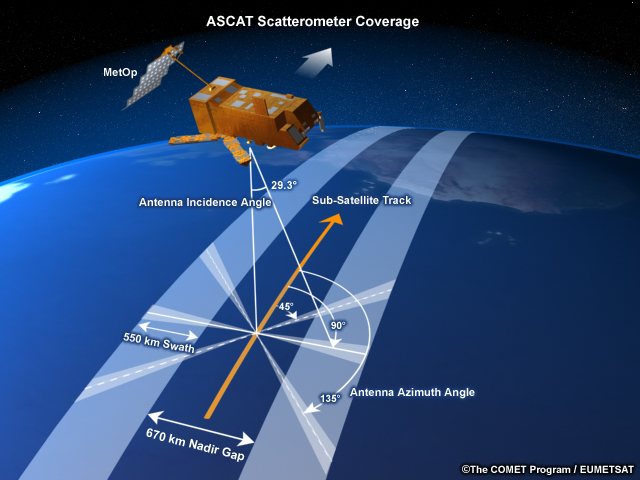

In [1]:
from IPython.display import Image
Image(filename='ASCAT_geometry.jpg') 

In [2]:
#First lets import the libraries we require
from pprint import pprint
from podaac import podaac as podaac
from podaac import podaac_utils as utils
from podaac import drive as drive

In [3]:
#Then we can create instances of the classes we will use
p = podaac.Podaac()
u = utils.PodaacUtils()
d = drive.Drive('podaac.ini', None, None)

In [4]:
# Let's discover PO.DAAC Wind data relating to Hurricane Florence, which
#  was a very recent major hurricane to impact Southeastern US
#    https://en.wikipedia.org/wiki/Hurricane_Florence
# Using specific parameters to confine the discovery space, we opt for the full 
# metadata record in atom format
ds_result = p.dataset_search(keyword='ASCAT', 
                             start_time='2018-09-12T00:00:01Z', 
                             end_time='2018-09-14T11:59:59Z', 
                             short_name='ASCATA-L2-Coastal', 
                             process_level='2', 
                             bbox='-81,28,-67,40', 
                             pretty='True', 
                             _format='atom', 
                             full='True')
print(ds_result)

<?xml version="1.0" ?>
<feed xmlns="http://www.w3.org/2005/Atom" xmlns:dc="http://purl.org/dc/terms/" xmlns:georss="http://www.georss.org/georss" xmlns:gml="http://www.opengis.net/gml" xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/" xmlns:podaac="https://podaac.jpl.nasa.gov/opensearch/" xmlns:time="http://a9.com/-/opensearch/extensions/time/1.0/">
	<title>PO.DAAC Dataset Search Results</title>
	<updated>2019-08-19T19:04:48.815967Z</updated>
	<id>tag:podaac.jpl.nasa.gov,2019-08-19</id>
	<author>
		<name>PO.DAAC Dataset Search Service</name>
	</author>
	<link href="https://podaac.jpl.nasa.gov/ws/search/podaac-granule-osd.xml" rel="search" type="application/opensearchdescription+xml"/>
	<link href="https://podaac.jpl.nasa.gov/ws/search/dataset?full=true&amp;processLevel=2&amp;keyword=ASCAT&amp;format=atom&amp;itemsPerPage=7&amp;startIndex=0&amp;bbox=-81%2C28%2C-67%2C40&amp;startTime=2018-09-12T00%3A00%3A01Z&amp;shortName=ASCATA-L2-Coastal&amp;endTime=2018-09-14T11%3A59%3A59Z" rel=

In [5]:
#Because we requested the Full response, we can actually extract the 
# PO.DAAC Drive URL for all granules contained within this dataset.
search_str = 'https://podaac-tools.jpl.nasa.gov/drive/files/'
drive_path = [ str(i) for i in ds_result.strip().split() if search_str in i ][0]
print(drive_path[5:])

"https://podaac-tools.jpl.nasa.gov/drive/files/allData/ascat/preview/L2/metop_a/coastal_opt"


In [9]:
#Next, lets search for Granules of interest relating to the above discovery operation
#Lets execute a search for specific granules from the following dataset
# MetOp-A ASCAT Level 2 Ocean Surface Wind Vectors Optimized for Coastal Ocean
# https://podaac.jpl.nasa.gov/dataset/ASCATA-L2-Coastal
# ...based upon temporal (start and end) and spatial contraints. 
result = p.granule_search(dataset_id='PODAAC-ASOP2-12C01',
                          start_time='2018-09-12T00:00:01Z',
                          end_time='2018-09-14T11:59:59Z',
                          bbox='-81,28,-67,40',
                          sort_by='timeAsc',
                          items_per_page='400',
                          _format='atom')
#print(result)
searchStr = 'totalResults'
numResultsStr = [ str(i) for i in result.strip().split() if searchStr in i ]
print(numResultsStr)

['<opensearch:totalResults>6</opensearch:totalResults>']


In [10]:
#Here's the actual granule names
pprint(u.mine_granules_from_granule_search(granule_search_response=str(result)))

['ascat_20180912_140900_metopa_61742_eps_o_coa_2401_ovw.l2.nc',
 'ascat_20180912_003900_metopa_61734_eps_o_coa_2401_ovw.l2.nc',
 'ascat_20180913_020000_metopa_61749_eps_o_coa_2401_ovw.l2.nc',
 'ascat_20180912_022100_metopa_61735_eps_o_coa_2401_ovw.l2.nc',
 'ascat_20180913_134800_metopa_61756_eps_o_coa_2401_ovw.l2.nc',
 'ascat_20180914_013900_metopa_61763_eps_o_coa_2401_ovw.l2.nc']


In [11]:
#Now we simply need to reproduce the Drive URL's for the above granules.
granules = d.mine_drive_urls_from_granule_search(granule_search_response=(str(result)))
pprint(granules)

['https://podaac-tools.jpl.nasa.gov/drive/files/allData/ascat/preview/L2/metop_a/coastal_opt/2018/255/ascat_20180912_140900_metopa_61742_eps_o_coa_2401_ovw.l2.nc.gz',
 'https://podaac-tools.jpl.nasa.gov/drive/files/allData/ascat/preview/L2/metop_a/coastal_opt/2018/255/ascat_20180912_003900_metopa_61734_eps_o_coa_2401_ovw.l2.nc.gz',
 'https://podaac-tools.jpl.nasa.gov/drive/files/allData/ascat/preview/L2/metop_a/coastal_opt/2018/256/ascat_20180913_020000_metopa_61749_eps_o_coa_2401_ovw.l2.nc.gz',
 'https://podaac-tools.jpl.nasa.gov/drive/files/allData/ascat/preview/L2/metop_a/coastal_opt/2018/255/ascat_20180912_022100_metopa_61735_eps_o_coa_2401_ovw.l2.nc.gz',
 'https://podaac-tools.jpl.nasa.gov/drive/files/allData/ascat/preview/L2/metop_a/coastal_opt/2018/256/ascat_20180913_134800_metopa_61756_eps_o_coa_2401_ovw.l2.nc.gz',
 'https://podaac-tools.jpl.nasa.gov/drive/files/allData/ascat/preview/L2/metop_a/coastal_opt/2018/257/ascat_20180914_013900_metopa_61763_eps_o_coa_2401_ovw.l2.nc.gz'

In [ ]:
#Let's retrieve these granules from PO.DAAC Drive.
#Note that the download_granules function actually decompresses
#and removes the compressed archive files locally for us.
d.download_granules(granule_collection=granules, path='./dummy')

In [ ]:
#Let's merge the files together
import glob, os, subprocess, shlex
nc_files = []
for file in glob.glob("*.nc"):
    nc_files.append(os.path.abspath(file))
str_nc_files = ' '.join(nc_files)
# Let's open the granules within Panoply - https://www.giss.nasa.gov/tools/panoply/
# which is a netCDF, HDF and GRIB Data Viewer
# developed by NASA's Goddard Institute for Space Studies
args = shlex.split('/Applications/Panoply.app/Contents/MacOS/Panoply ' + str_nc_files)
subprocess.Popen(args)

In [ ]:
#Finally, let's subset the granule using L2SS
#and download only the area of interest.
from podaac import l2ss as l2ss
l = l2ss.L2SS()
granule_id = 'ascat_20180913_134800_metopa_61756_eps_o_coa_2401_ovw.l2.nc'
query = {
        "email": "your_email@here.com",
        "query":
        [
            {
                "compact": "true",
                "datasetId": "PODAAC-ASOP2-12C01",
                "bbox": "-81,28,-67,40",
                "variables": ["lat", "lon", "time", "wind_speed"],
                "granuleIds": ["ascat_20180913_134800_metopa_61756_eps_o_coa_2401_ovw.l2.nc"]
            }
        ]
    }
l.granule_download(query_string=query)
ss_granule = os.path.abspath('subsetted-' + granule_id)
print(ss_granule)
# Finally let's make a call to Panoply to open the subsetted granule.
args = shlex.split('/Applications/Panoply.app/Contents/MacOS/Panoply ' + ss_granule)
subprocess.Popen(args)

In [ ]:
# A final comment and some food for thought, if you were
# to write the above python script from scratch, you would
# have to write around 400 or so lines of code.
# Less the print statements, we've achieved it above in less
# than 30 lines of code!
# What is more, the code we have used has been tested by users,
# as well as by our rich unit testing suite. Every function
# in Podaacpy has an accompanying test!

# Please report any issues with the above notebook at 
# https://github.com/nasa/podaacpy/issues